In [195]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.ndimage
import scipy.optimize

In [196]:
from astropy.io import fits

In [197]:
raw_frames_root = '/volumes/abraham/xcor_data/ATLAS_mwa57694/'
fname = '02a57694o0324I.fits'

hdulist = fits.open(raw_frames_root+fname)
img = 1.*hdulist[0].data
n = img.shape[0]
print(img.shape)
header = hdulist[0].header
hdulist.close()

(10560, 10560)


In [198]:
def draw_region_lines():
    for i in range(1,8):
        plt.plot([n/8*i/factor,n/8*i/factor],[0,n/factor],'w--')
    plt.plot([0,n/factor],[n/2/factor,n/2/factor],'w--')

(0, 1056)

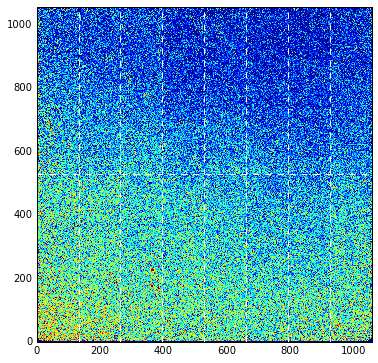

In [199]:
plt.figure(figsize=(14,6))
factor = 10
plt.imshow(img[::factor,::factor],interpolation='nearest',vmin=300,vmax=400)
draw_region_lines()
plt.xlim([0,n/factor])
plt.ylim([0,n/factor])

In [200]:
n/8

1320

In [201]:
n-n/8*2

7920

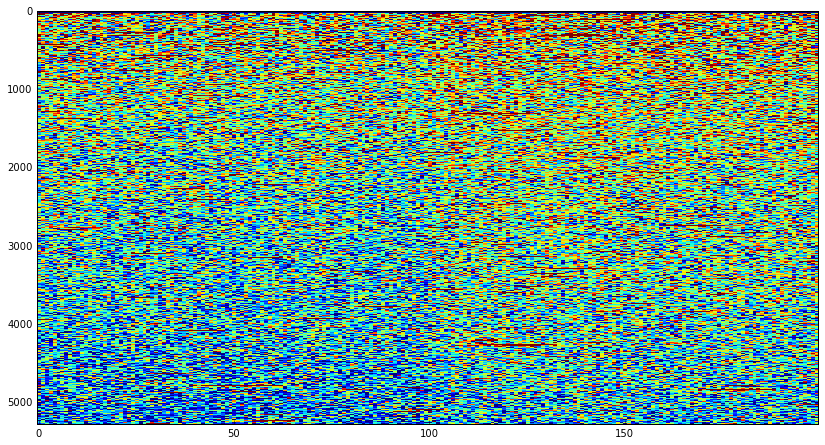

In [202]:
plt.figure(figsize=(14,16))
factor = 10
plt.imshow(img[:n/2,n-n/8-100:n-n/8+100],interpolation='nearest',vmin=310,vmax=370,aspect=.02)

In [203]:
w = n/8
w

1320

(200, 500)

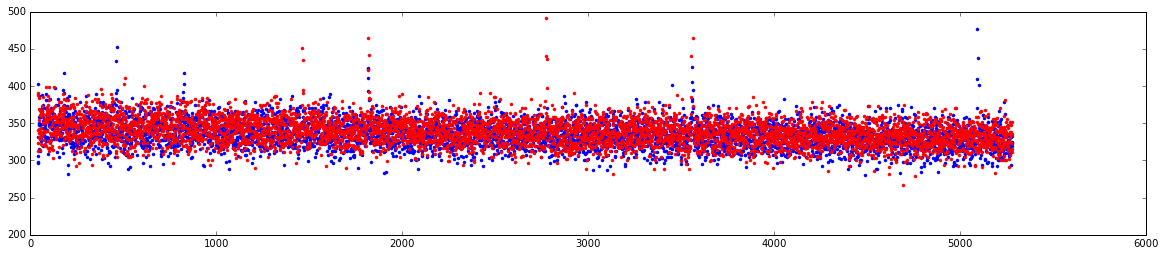

In [204]:
plt.figure(figsize=(20,4))
plt.plot(img[:n/2,n-w-1],'b.')
plt.plot(img[:n/2,n-w+i],'r.')
plt.ylim([200,500])

In [205]:
for i in range(-5,5):
    mask = (img[:n/2,n-w-1+i] > 250)&(img[:n/2,n-w-1+i] < 400)&(img[:n/2,n-w+i] > 250)&(img[:n/2,n-w+i] < 400)
    print(i,np.mean(img[:n/2,n-w-1+i][mask]-img[:n/2,n-w+i][mask]))

(-5, -0.50009573042312849)
(-4, 0.56997893930691179)
(-3, 0.13134214053226115)
(-2, -1.0044035994639096)
(-1, 0.64065196548418024)
(0, -2.8677289306968707)
(1, 0.66160645657186778)
(2, -0.98866474543707972)
(3, -0.39681014604150655)
(4, -0.4490580545943868)


In [206]:
# what if we include multiply columns in the averaged
num_cols = 4
for i in [-12,-8,-4,0,4,8,12]:
    mask = (img[:n/2,n-w-num_cols+i:n-w+i] > 250)&(img[:n/2,n-w-num_cols+i:n-w+i] < 400)&(img[:n/2,n-w+i:n-w+i+num_cols] > 250)&(img[:n/2,n-w+i:n-w+i+num_cols] < 400)
    print(i,np.mean(img[:n/2,n-w-num_cols+i:n-w+i][mask]-img[:n/2,n-w+i:n-w+i+num_cols][mask]))

(-12, 0.066618773946360149)
(-8, -0.075764841277452769)
(-4, -0.057081236520488854)
(0, -2.8914151124783696)
(4, -1.7530555288230198)
(8, 0.20935830164155395)
(12, -1.5069688931757896)


In [217]:
x = np.zeros(n-1)
offset = 60
for i in range(n-1):
    mask = (img[offset:n/2,i] > 250)&(img[offset:n/2,i] < 400)&(img[offset:n/2,i+1] > 250)&(img[offset:n/2,i+1] < 400)
    x[i] = np.mean(img[offset:n/2,i][mask]-img[offset:n/2,i+1][mask])
    #x[i] = np.mean(img[offset:n/2,i][mask]/img[offset:n/2,i+1][mask])

(-5, 9)

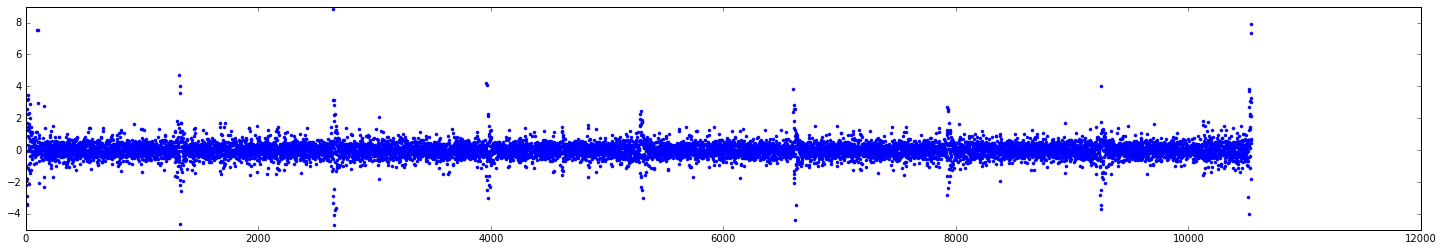

In [221]:
plt.figure(figsize=(25,4))
plt.plot(x,'.')
plt.ylim([-5,9])

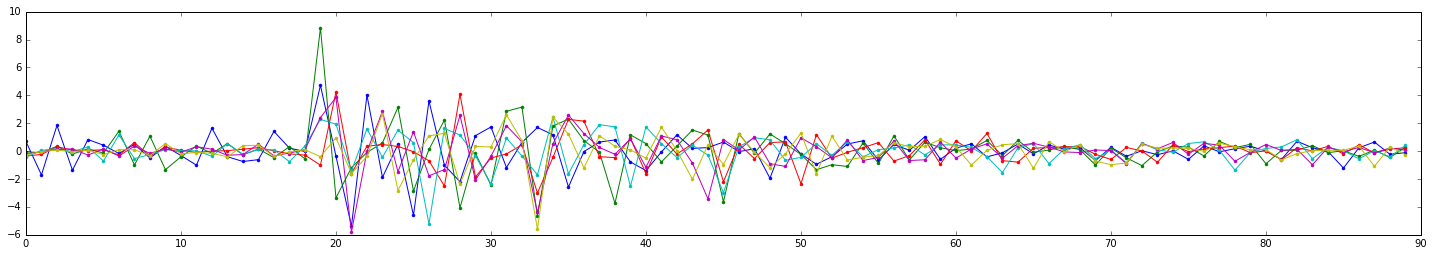

In [220]:
plt.figure(figsize=(25,4))

for i in range(6):
    plt.plot(x[i*w+1300:(i+2)*w-1250],'.-')
#plt.ylim([.98,1.03])